# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

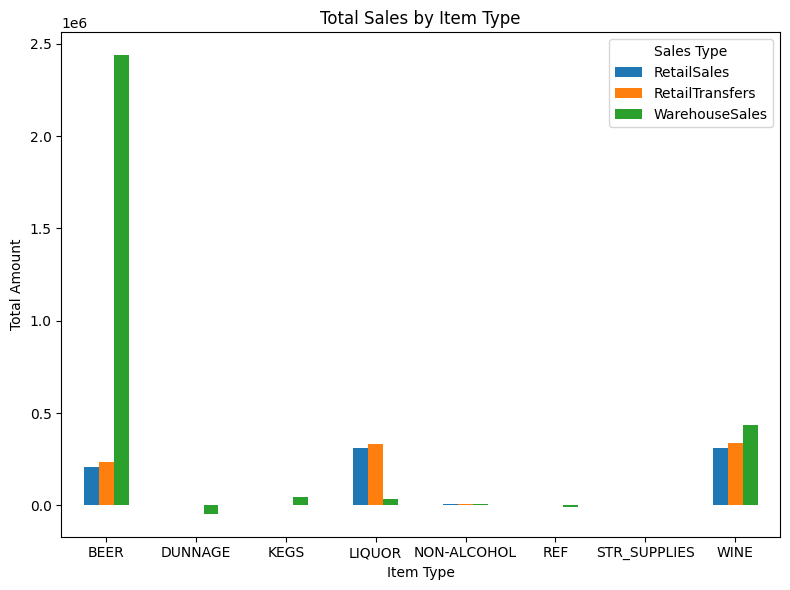

In [4]:
# Compute total sales for each row

# Aggregate totals by ItemType
totals = data.groupby('ItemType')[['RetailSales', 'RetailTransfers', 'WarehouseSales']].sum()

# Plot bar chart
totals.plot(kind='bar', figsize=(8,6))
plt.title('Total Sales by Item Type')
plt.ylabel('Total Amount')
plt.xlabel('Item Type')
plt.xticks(rotation=0)
plt.legend(title='Sales Type')
plt.tight_layout()
plt.show()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

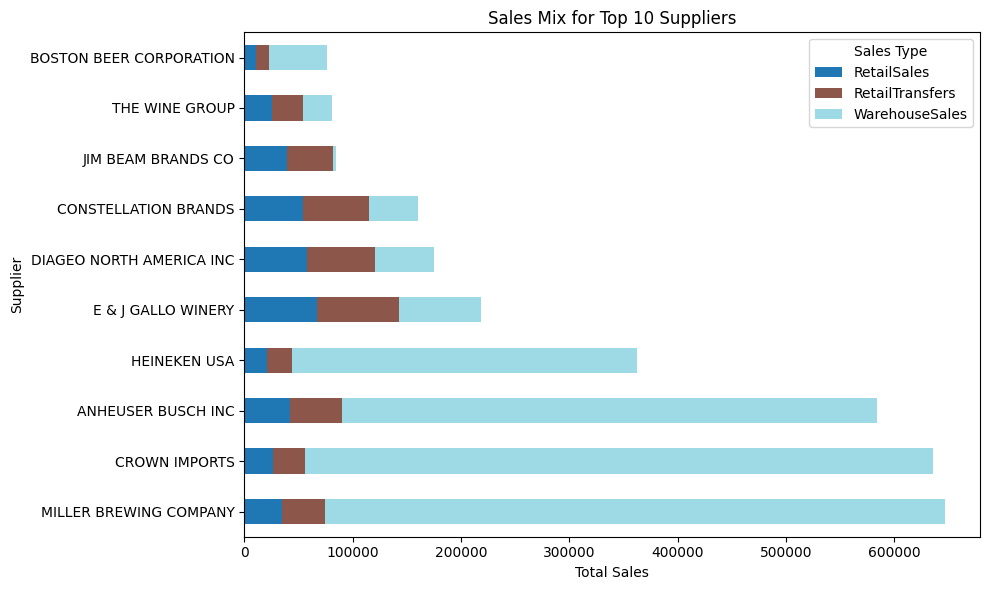

In [5]:

data['TotalSales'] = data['RetailSales'] + data['RetailTransfers'] + data['WarehouseSales']

supplier_totals = data.groupby('Supplier')[['RetailSales', 'RetailTransfers', 'WarehouseSales', 'TotalSales']].sum()

# Get top 10 suppliers by total sales
top_suppliers = supplier_totals.sort_values(by='TotalSales', ascending=False).head(10)

# Plot horizontal stacked bar chart
top_suppliers[['RetailSales', 'RetailTransfers', 'WarehouseSales']].plot(
    kind='barh',
    stacked=True,
    figsize=(10,6),
    colormap='tab20'
)

plt.xlabel('Total Sales')
plt.ylabel('Supplier')
plt.title('Sales Mix for Top 10 Suppliers')
plt.legend(title='Sales Type')
plt.tight_layout()
plt.show()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

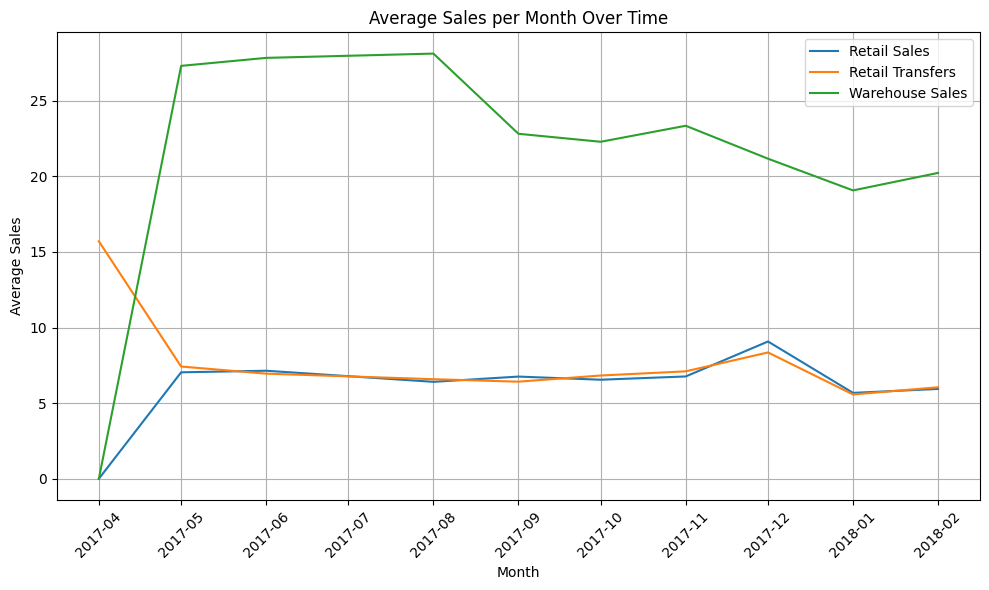

In [6]:

# Create a datetime column for proper time series plotting
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Group by month and calculate average sales
monthly_avg = data.groupby('Date')[['RetailSales', 'RetailTransfers', 'WarehouseSales']].mean()

# Plot multi-line chart
plt.figure(figsize=(10,6))
plt.plot(monthly_avg.index, monthly_avg['RetailSales'], label='Retail Sales')
plt.plot(monthly_avg.index, monthly_avg['RetailTransfers'], label='Retail Transfers')
plt.plot(monthly_avg.index, monthly_avg['WarehouseSales'], label='Warehouse Sales')

plt.title('Average Sales per Month Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Plot the same information as above but as a bar chart.

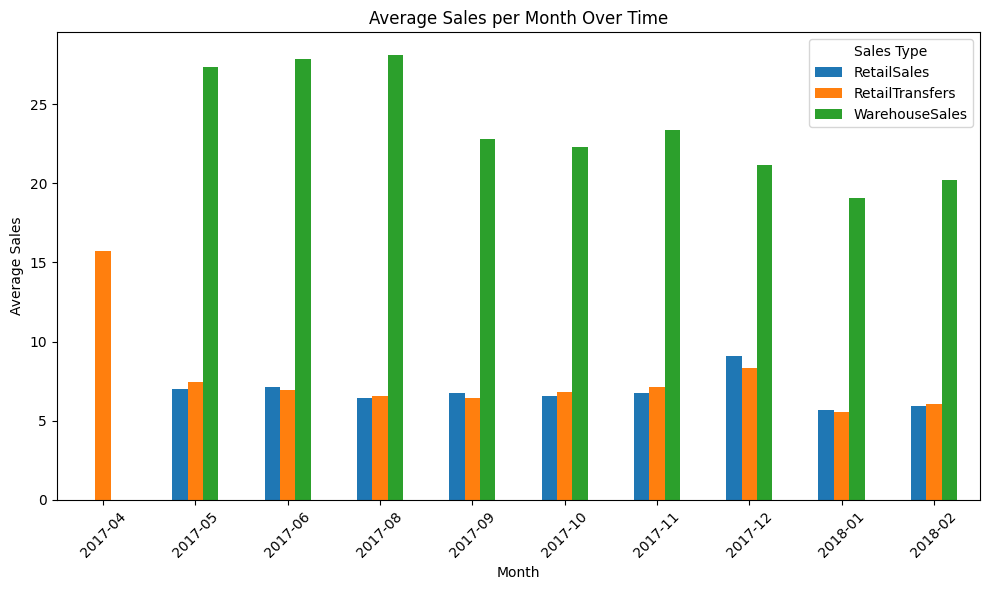

In [7]:
# Plot grouped bar chart using pandas directly
ax = monthly_avg.plot(kind='bar', figsize=(10,6))
ax.set_xlabel('Month')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales per Month Over Time')
ax.set_xticklabels([date.strftime('%Y-%m') for date in monthly_avg.index], rotation=45)
plt.legend(title='Sales Type')
plt.tight_layout()
plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

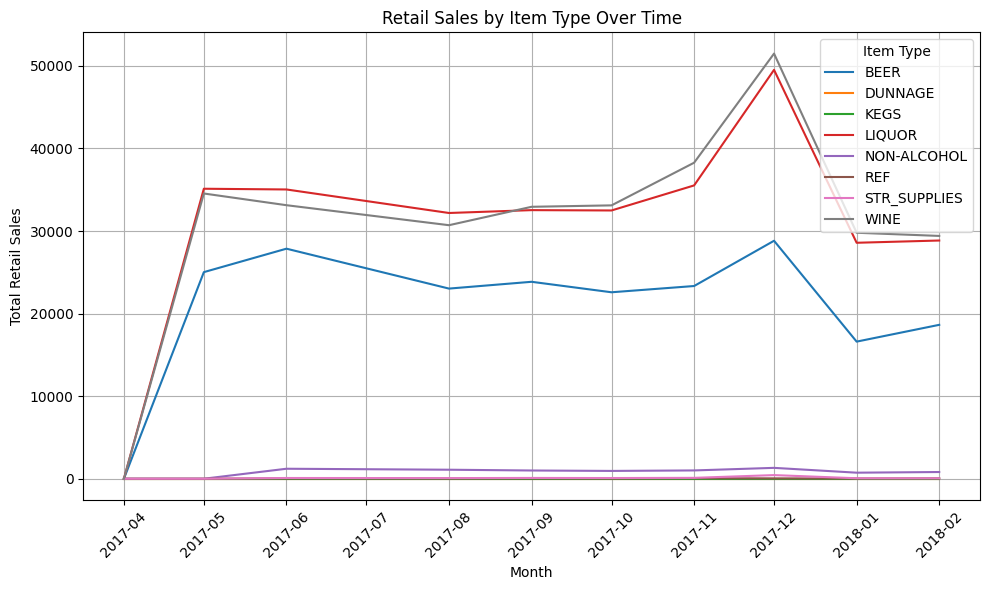

In [8]:
# Group by Date and ItemType, summing RetailSales
sales_by_type = data.groupby(['Date', 'ItemType'])['RetailSales'].sum().unstack(fill_value=0)

# Plot multi-line chart
plt.figure(figsize=(10,6))
for item_type in sales_by_type.columns:
    plt.plot(sales_by_type.index, sales_by_type[item_type], label=item_type)

plt.title('Retail Sales by Item Type Over Time')
plt.xlabel('Month')
plt.ylabel('Total Retail Sales')
plt.xticks(rotation=45)
plt.legend(title='Item Type')
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Plot the same information as above but as a bar chart.

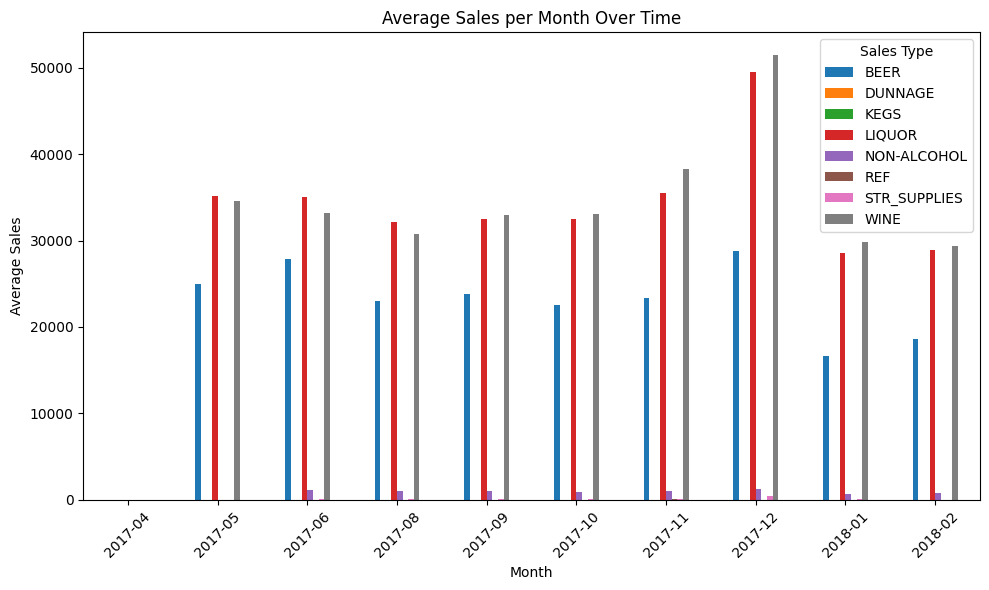

In [9]:
ax = sales_by_type.plot(kind='bar', figsize=(10,6))
ax.set_xlabel('Month')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales per Month Over Time')
ax.set_xticklabels([date.strftime('%Y-%m') for date in monthly_avg.index], rotation=45)
plt.legend(title='Sales Type')
plt.tight_layout()
plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

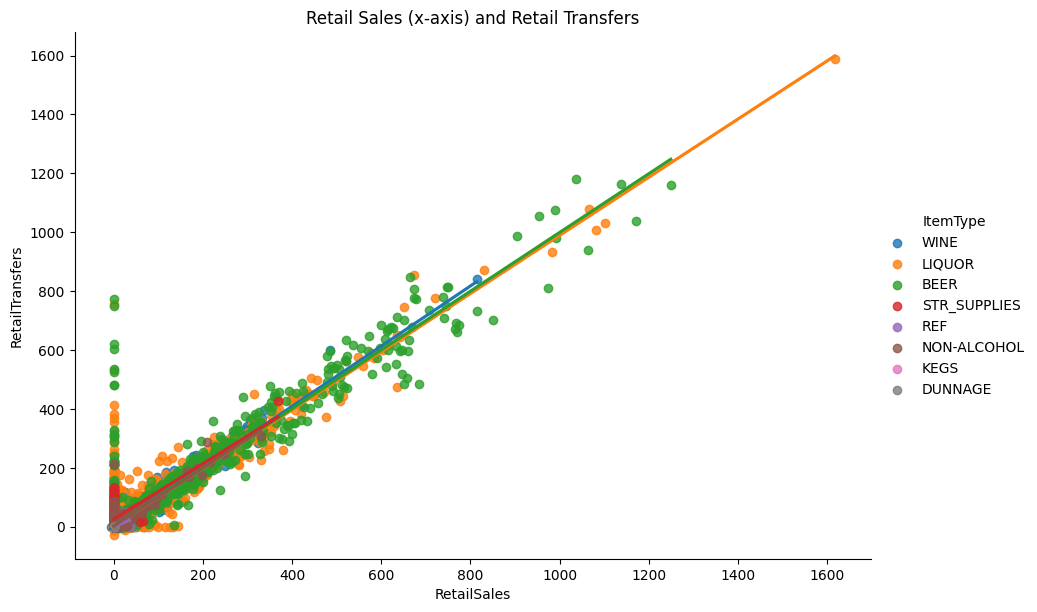

In [10]:
# Basic lmplot
sns.lmplot(
    data=data,
    x='RetailSales',            # x-axis variable
    y='RetailTransfers',            # y-axis variable
    hue='ItemType',   # optional, color by category   
    height=6,         # figure height
    aspect=1.5,       # width/height ratio
    ci=None           # confidence interval; None disables it
)

plt.title('Retail Sales (x-axis) and Retail Transfers')
plt.show()

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Year             128355 non-null  int64         
 1   Month            128355 non-null  int64         
 2   Supplier         128331 non-null  object        
 3   ItemCode         128355 non-null  object        
 4   Description      128355 non-null  object        
 5   ItemType         128354 non-null  object        
 6   RetailSales      128355 non-null  float64       
 7   RetailTransfers  128355 non-null  float64       
 8   WarehouseSales   128355 non-null  float64       
 9   TotalSales       128355 non-null  float64       
 10  Date             128355 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 10.8+ MB


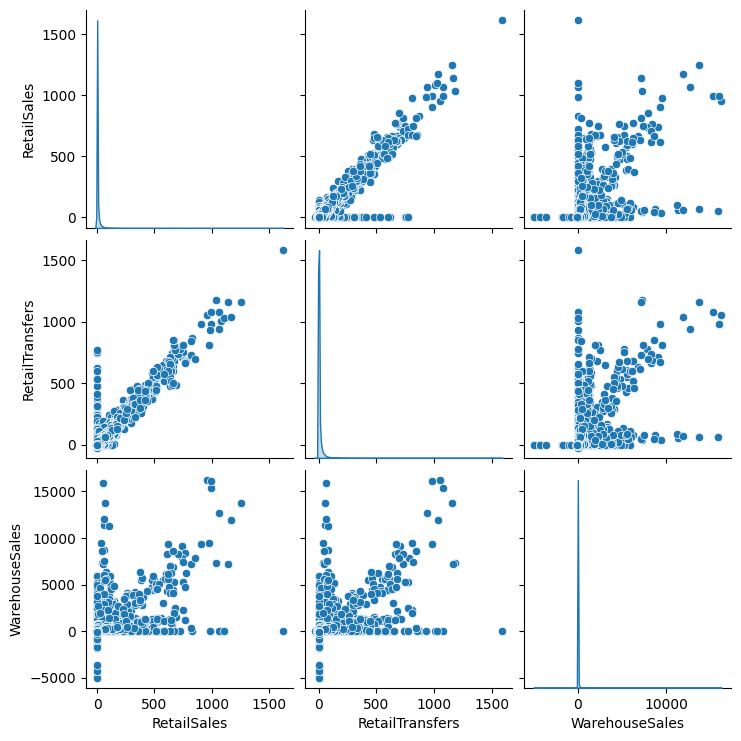

In [11]:
# sns.pairplot(data)
clns = ["RetailSales", "RetailTransfers", "WarehouseSales"]
data.info()

sns.pairplot(data[clns], diag_kind='kde')  # sample up to 1000 rows